In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm 
import random as rd
import itertools
from scipy.stats import qmc, ttest_ind, f
import pickle
from multiprocessing import Pool

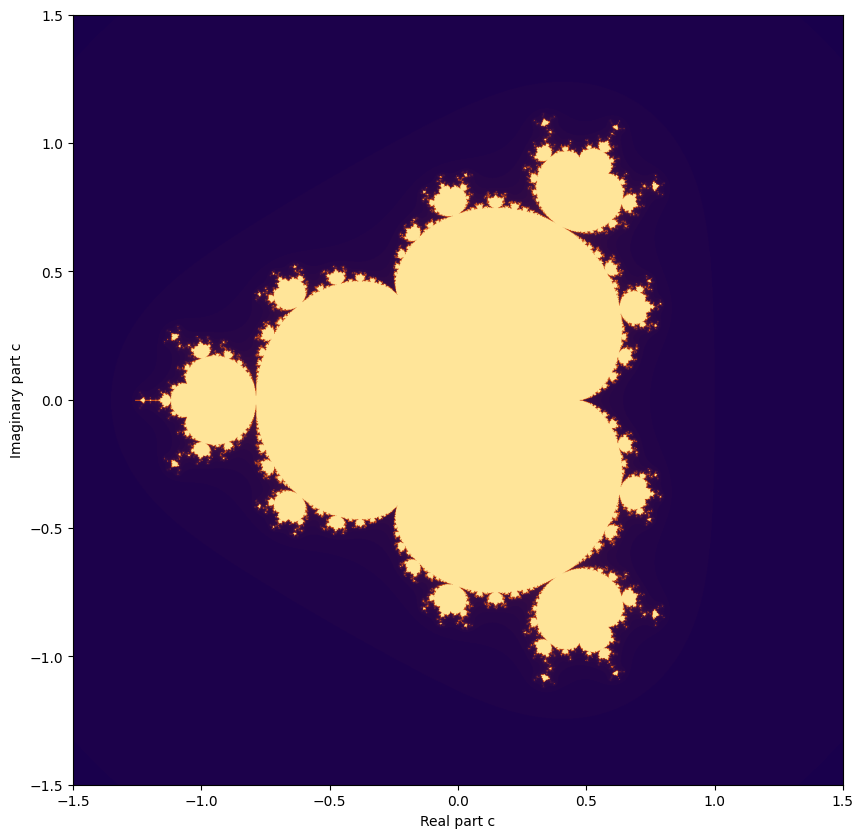

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm 

# set graph size and axes
width, height = 1500, 1500
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5

# custom coloring 
colors = [(0.1, 0, 0.3), (0.8, 0.3, 0.1), (1, 0.9, 0.6)]    
name = "nicemap"
cmap = LinearSegmentedColormap.from_list(name, colors)

# max iterations we test for to let it escape, increase for more detail
max_iterations = 100

# empty set to store iteration counts
mandelbrot_set = np.zeros((height, width))

# Iterate over each pixel in the image
for i in range(width):
    for pixel in range(height):
        # position to complex number. complex(computes real part, computes imaginary part) 
        c = complex(x_min + (i / width) * (x_max - x_min),
                    y_min + (pixel / height) * (y_max - y_min))
        # set z at time 0 = 0 
        z = 0 
        # keep count of iterations
        iteration = 0
        
        # mandelbrot where we set a threshold that is equal to 2 and apply formula
        # change **d for m2 m3 and m4
        while abs(z) <= 2 and iteration < max_iterations:
            z = z**4 + c 
            iteration += 1
            
        # store iterations
        mandelbrot_set[pixel, i] = iteration

# plot
plt.figure(figsize=(12,10))
plt.imshow(mandelbrot_set, cmap, extent=(x_min, x_max, y_min, y_max))
# plt.colorbar(label="iterations")
plt.xlabel("Real part c")
plt.ylabel("Imaginary part c")
plt.show()

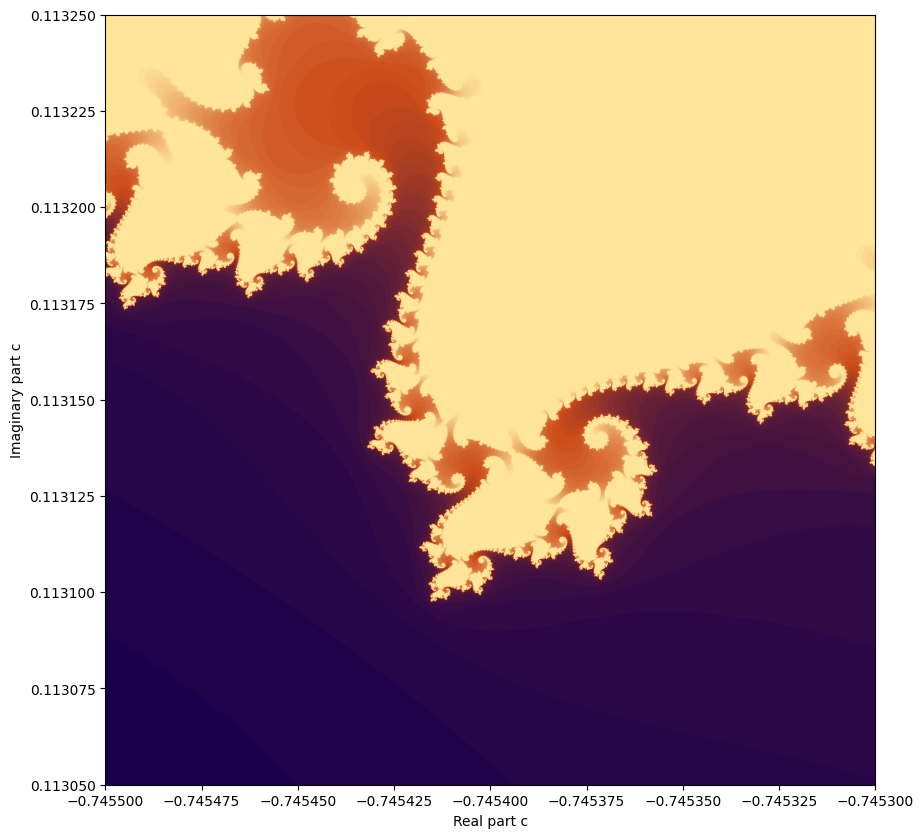

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random as rd
import itertools
from scipy.stats import qmc

# set graph size and axes
width, height = 2000, 2000
# zoom 1
# x_min, x_max = -1.405, -1.395
# y_min, y_max = -0.005, 0.005
# zoom2
x_min, x_max = -0.7455, -0.7453
y_min, y_max = 0.11305, 0.11325

# custom coloring 
colors = [(0.1, 0, 0.3), (0.8, 0.3, 0.1), (1, 0.9, 0.6)]    
name = "nicemap"
cmap = LinearSegmentedColormap.from_list(name, colors)

# max iterations we test for to let it escape, increase for more detail
max_iterations = 100

# empty set to store iteration counts
mandelbrot_set = np.zeros((height, width))

# Iterate over each pixel in the image
for i in range(width):
    for pixel in range(height):
        # position to complex number. complex(computes real part, computes imaginary part) 
        c = complex(x_min + (i / width) * (x_max - x_min),
                    y_min + (pixel / height) * (y_max - y_min))
        # set z at time 0 = 0 
        z = 0 
        # keep count of iterations
        iteration = 0
        
        # mandelbrot where we set a threshold that is equal to 2 and apply formula
        while abs(z) <= 2 and iteration < max_iterations:
            z = z**2 + c 
            iteration += 1
            
        # store iterations
        mandelbrot_set[pixel, i] = iteration

# plot
plt.figure(figsize=(12,10))
plt.imshow(mandelbrot_set, cmap, extent=(x_min, x_max, y_min, y_max))
# plt.colorbar(label="iterations")
plt.xlabel("Real part c")
plt.ylabel("Imaginary part c")
plt.show()

In [9]:
n_it = [1, 10, 100, 1000, 10000, 100000, 100000, 1000000] 
n_sample = [10, 100, 100, 1000, 10000, 100000, 1000000, 1000000]
# complex plain boundaries: y_min, y_max
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5

def calculate_Am(): 
    pass 



def mandel_check(complex_number, max_iteration): 
    z = 0
    for i in range(max_iteration): 
        z = z**2 + complex_number
        if abs(z) > 2: 
            return False
    return True

def monte_carlo(n_samples, sample_type,  n_iterations, y_min, y_max, x_min, x_max): 
    true_count = 0      

    if sample_type == "lhs": 
        points = lhs_qmc(n_samples, y_min, y_max, x_min, x_max)
    elif sample_type == "orthogonal":
        points = orthogonal_sample(n_samples, x_min, x_max, y_min, y_max)
    elif sample_type == "pure_random": 
        points = pure_radom_sample(y_min, y_max, x_min, x_max, n_samples)


    for i in range(len(points)): 
        x_coordinate, y_coordinate, complex_element = points[i][0], points[i][1], points[i][2]
        if mandel_check(complex_element, n_iterations):
            true_count +=1 

    area_total = (x_max-x_min)*(y_max-y_min)
    mandel_area = (true_count/(n_samples)) * area_total
    #print(f"Estimated area for {n_samples} samples and {n_iterations} iterations: {mandel_area}")
    return mandel_area

def pure_radom_sample(y_min, y_max, x_min, x_max, n_samples):
    samples = [] 
    for i in range(n_samples): 
        x_coordinate = rd.uniform(x_min, x_max)
        y_coordinate  = rd.uniform(y_min, y_max)
        complex_element = complex(x_coordinate,y_coordinate)
        samples.append([x_coordinate, y_coordinate, complex_element])
    return samples


def lhs_qmc(n_samples, y_min, y_max, x_min, x_max):
    sampler = qmc.LatinHypercube(d=2)  

    # generate  samples
    lhs_samples = sampler.random(n=n_samples)

    # Rescale 
    x_coordinates_rescaled = x_min + (x_max - x_min) * lhs_samples[:, 0]
    y_coordinates_rescaled = y_min + (y_max - y_min) * lhs_samples[:, 1]
    complex_elements = x_coordinates_rescaled + 1j * y_coordinates_rescaled

    # Combine
    points = np.column_stack((x_coordinates_rescaled, y_coordinates_rescaled, complex_elements))
    
    return points.tolist()
 

def orthogonal_sample(n_samples, x_min, x_max, y_min, y_max): 
    grid_size = int(np.sqrt(n_samples))
    
    # Create the grid
    grid_x = np.linspace(x_min, x_max, grid_size)
    grid_y = np.linspace(y_min, y_max, grid_size)
    
    points = [[x, y, complex(x, y)] for x in grid_x for y in grid_y]

    
    
    rd.shuffle(points)

    return points



sample_type = "pure_random" # alternitive: "pure_random", "orthogonal"

for setting in n_sample: 
   monte_carlo(setting,sample_type, 10,  y_min, y_max, x_min, x_max)



### Iteration Runs ###

Calculating for i = 1000000 iterations: 100%|██████████| 200/200 [08:52<00:00,  2.66s/it]


mean area estimate for i = 1.4863499999999998


Calculating for 100000 iterations: 100%|██████████| 200/200 [00:53<00:00,  3.75it/s]


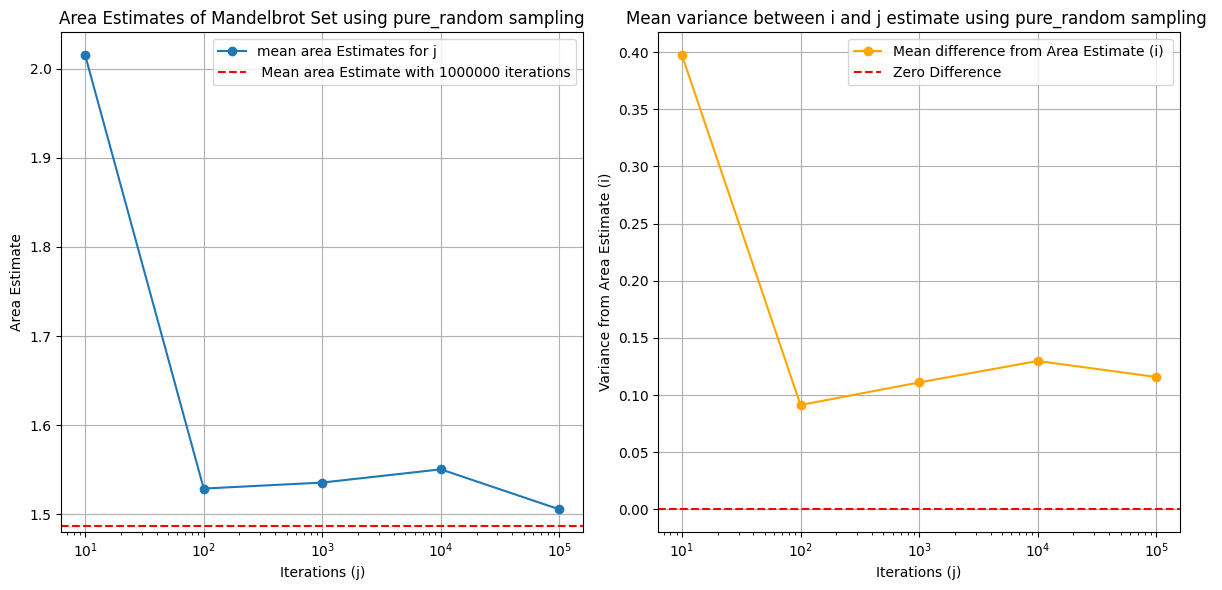

In [27]:


n_runs = 200
samples = 100
i = 1000000
j = [10, 100, 1000, 10000, 100000]# 1000, 10000,100000,1000000] 


def iteration_plot(i, j, samples, sample_type, n_runs): 

    j_estimates = np.zeros(( n_runs, len(j)))
    
    plt.figure(figsize=(12, 6))
    i_estimate = []
    #Get baseline
    for run in tqdm(range(n_runs), desc= f"Calculating for i = {i} iterations"): 
        area_run_i = monte_carlo(samples, sample_type, i, y_min, y_max, x_min, x_max)
        i_estimate.append(area_run_i)
    area_estimate_i = np.mean(i_estimate)
    print(f"mean area estimate for i = {area_estimate_i}")
        


    for setting in range(len(j)): 
        
        for  run in tqdm(range(n_runs), desc= f"Calculating for {j[setting]} iterations"):   
                     
            area_setting_j  = monte_carlo(samples,sample_type, j[setting], y_min, y_max, x_min, x_max)
            j_estimates[run][setting] = area_setting_j
            
        
       
    mean_area = np.mean(j_estimates, axis=0)
    mean_differences = np.mean(np.square(j_estimates - area_estimate_i), axis=0)


    #  j
    plt.subplot(1, 2, 1)
    plt.plot(j, mean_area, marker='o', label=f'mean area Estimates for j')       
    plt.axhline(y=area_estimate_i, color='r', linestyle='--', label=f' Mean area Estimate with {i} iterations')
    plt.title(f'Area Estimates of Mandelbrot Set using {sample_type} sampling')
    plt.xlabel('Iterations (j)')
    plt.xscale("log")
    plt.ylabel('Area Estimate')
    plt.legend()
    plt.grid(True)

    # differences
    plt.subplot(1, 2, 2)
    plt.plot(j, mean_differences, marker='o', color='orange', label=f'Mean difference from Area Estimate (i) ')
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Difference')
    plt.title(f'Mean variance between i and j estimate using {sample_type} sampling ')
    plt.xlabel('Iterations (j)')
    plt.xscale("log")

    plt.ylabel('Variance from Area Estimate (i)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    
        


iteration_plot(i, j, samples, "pure_random", n_runs)



Calculating for i = 1000000 iterations: 100%|██████████| 200/200 [08:59<00:00,  2.70s/it]


mean area estimate for i = 1.5021


Calculating for 100000 iterations: 100%|██████████| 200/200 [00:54<00:00,  3.69it/s]


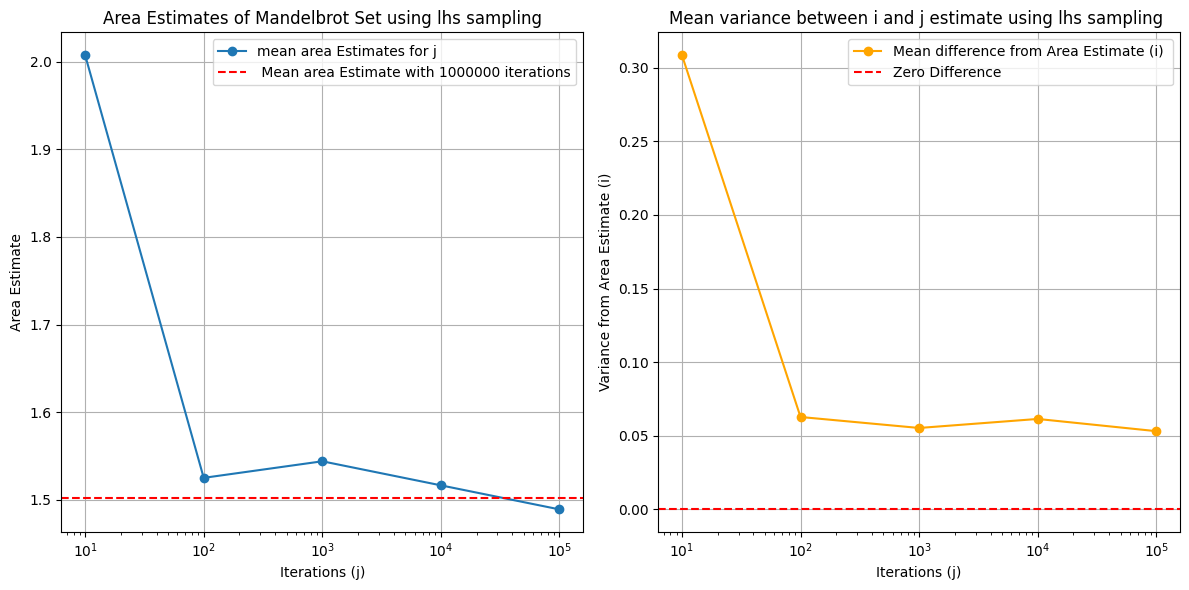

In [28]:
iteration_plot(i, j , samples, "lhs", n_runs )


Calculating for i = 1000000 iterations: 100%|██████████| 200/200 [08:38<00:00,  2.59s/it]


mean area estimate for i = 1.44


Calculating for 100000 iterations: 100%|██████████| 200/200 [00:52<00:00,  3.78it/s]


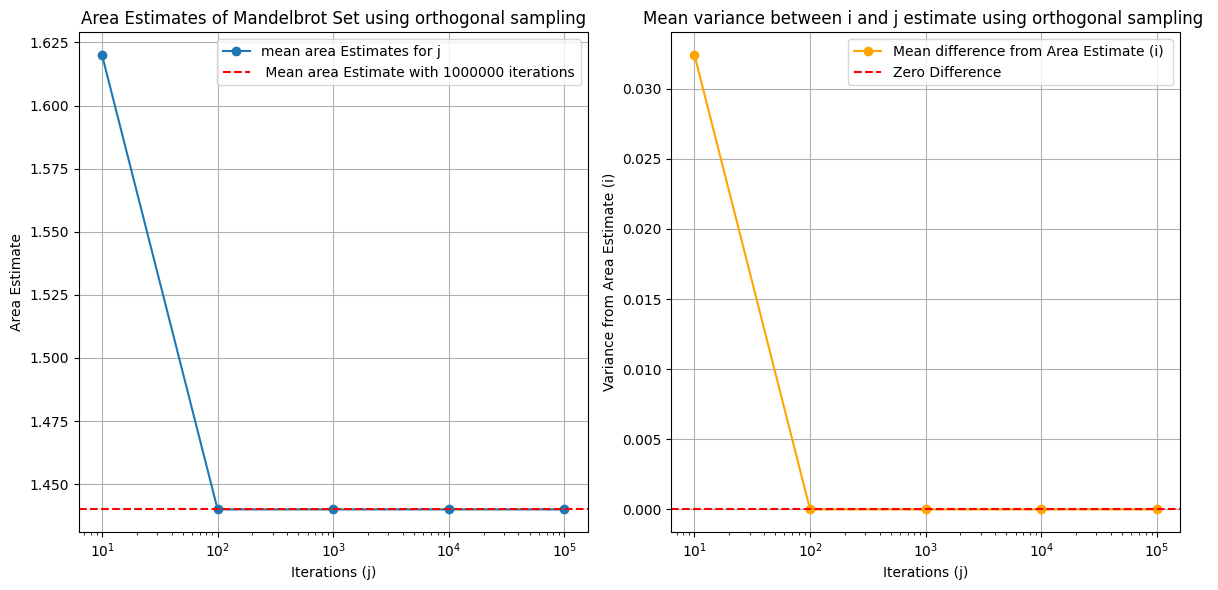

In [29]:
iteration_plot(i, j, samples, "orthogonal", n_runs)

### Sample Runs ###


Calculating for i = 1000000 samples: 100%|██████████| 200/200 [16:11<00:00,  4.86s/it]


mean area estimate for i = 1000000 samples: 1.5460085249999997


Calculating for 100000 samples: 100%|██████████| 200/200 [01:35<00:00,  2.09it/s]


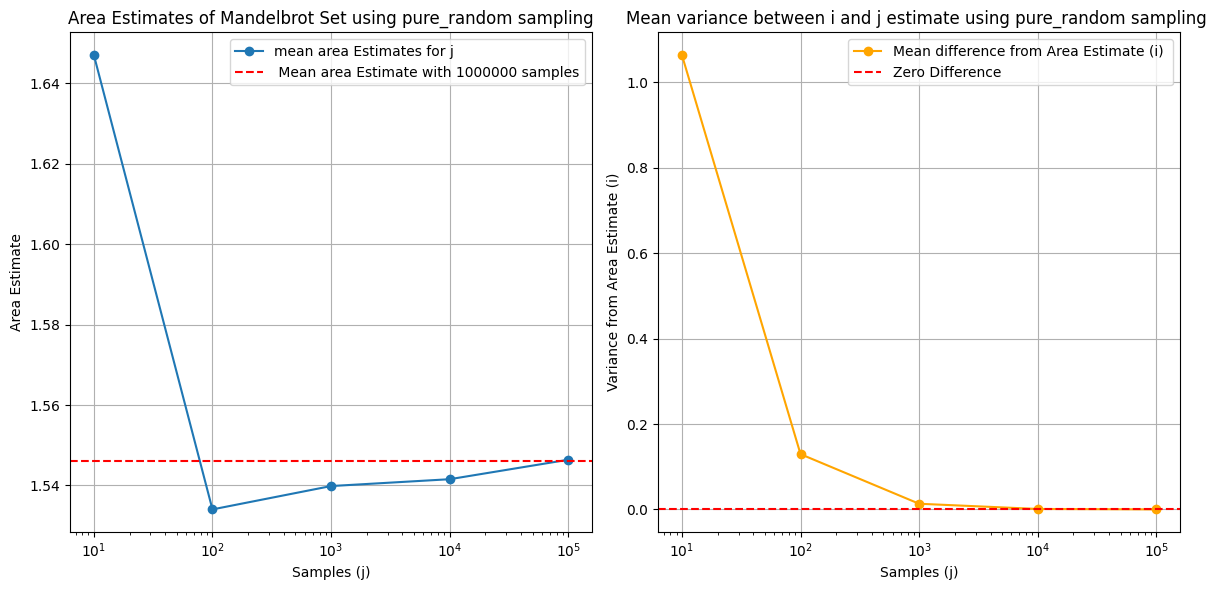

In [30]:

def compute_variance(area_setimate_i, area_estimate_j):
    squared_difference = (area_estimate_j-area_setimate_i) ** 2
    return squared_difference 

     

n_runs = 200
n_iterations = 100
i = 1000000
j = [10, 100, 1000, 10000, 100000] 


def sample_plot(i, j, n_iterations, sample_type, n_runs): 

    j_estimates = np.zeros(( n_runs, len(j)))
    differences = np.zeros(( n_runs, len(j)))
    
    plt.figure(figsize=(12, 6))
    i_estimate = []
    for run in tqdm(range(n_runs), desc= f"Calculating for i = {i} samples"): 
        area_run_i = monte_carlo(i, sample_type, n_iterations, y_min, y_max, x_min, x_max)
        i_estimate.append(area_run_i)
    area_estimate_i = np.mean(i_estimate)
    print(f"mean area estimate for i = {i} samples: {area_estimate_i}")
        


    for setting in range(len(j)): 
        
        for  run in tqdm(range(n_runs), desc= f"Calculating for {j[setting]} samples"):   
                     
            area_setting_j  = monte_carlo(j[setting],sample_type, n_iterations, y_min, y_max, x_min, x_max)
            variance = compute_variance(area_estimate_i, area_setting_j)

            #differences[run][setting]= variance
            j_estimates[run][setting] = area_setting_j
        
            
        
       
    mean_area = np.mean(j_estimates, axis=0)
    #mean_differences = np.mean(differences, axis = 0 )
    mean_differences = np.mean(np.square(j_estimates - area_estimate_i), axis=0)

    #  j
    plt.subplot(1, 2, 1)
    plt.plot(j, mean_area, marker='o', label=f'mean area Estimates for j')       
    plt.axhline(y=area_estimate_i, color='r', linestyle='--', label=f' Mean area Estimate with {i} samples')
    plt.title(f'Area Estimates of Mandelbrot Set using {sample_type} sampling')
    plt.xlabel('Samples (j)')
    plt.xscale("log")
    plt.ylabel('Area Estimate')
    plt.legend()
    plt.grid(True)

    # differences
    plt.subplot(1, 2, 2)
    plt.plot(j, mean_differences, marker='o', color='orange', label=f'Mean difference from Area Estimate (i) ')
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Difference')
    plt.title(f'Mean variance between i and j estimate using {sample_type} sampling ')
    plt.xlabel('Samples (j)')
    plt.xscale("log")

    plt.ylabel('Variance from Area Estimate (i)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    
        


sample_plot(i, j, n_iterations, "pure_random", n_runs)



Calculating for i = 1000000 samples: 100%|██████████| 200/200 [14:33<00:00,  4.37s/it]


mean area estimate for i = 1000000 samples: 1.5458239800000002


Calculating for 100000 samples: 100%|██████████| 200/200 [01:28<00:00,  2.26it/s]


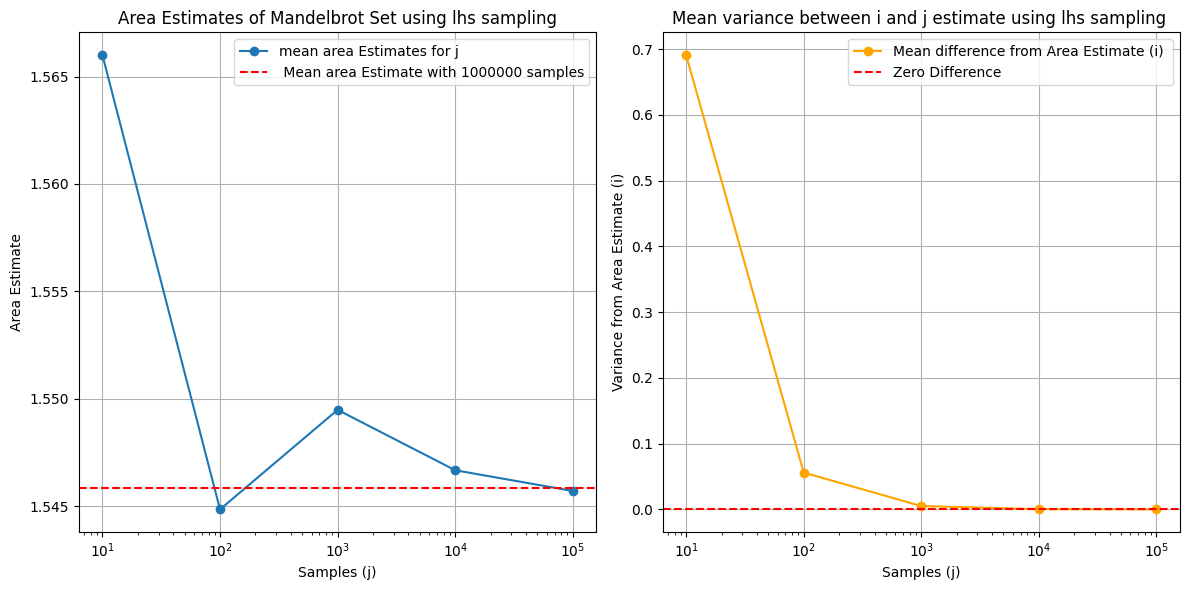

In [31]:
sample_plot(i, j, n_iterations, "lhs", n_runs)


Calculating for i = 1000000 samples: 100%|██████████| 200/200 [19:25<00:00,  5.83s/it]


mean area estimate for i = 1000000 samples: 1.5429419999999998


Calculating for 100000 samples: 100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


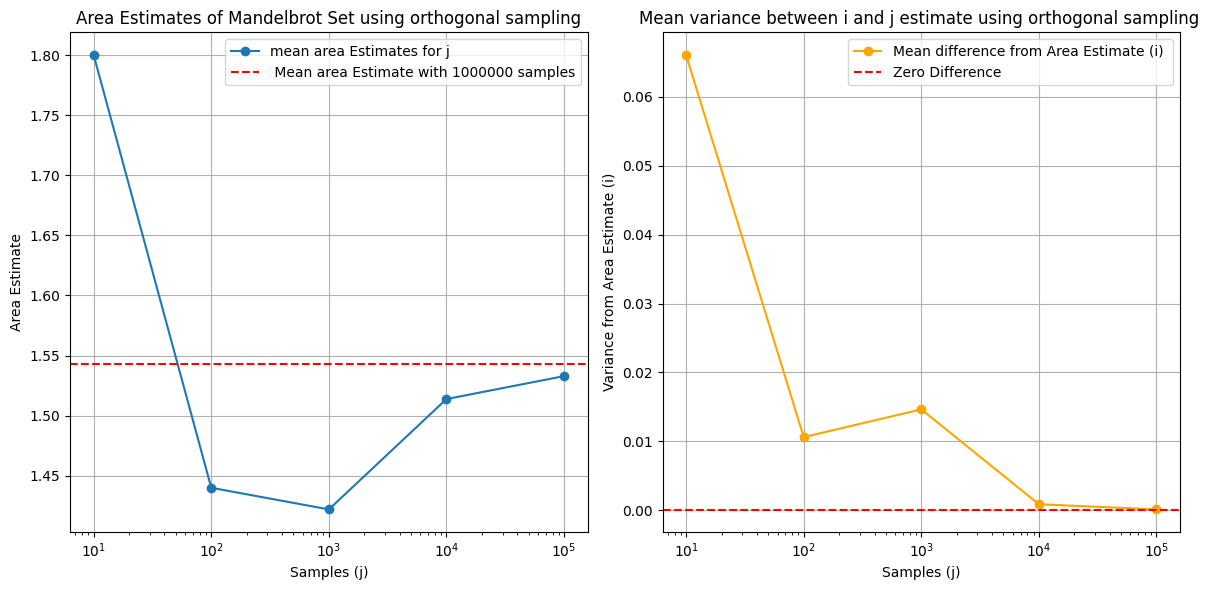

In [32]:
sample_plot(i, j, n_iterations, "orthogonal", n_runs)


# Altered sampling methods that include antithetic variates

In [458]:
from scipy.stats import ttest_ind, levene, bartlett
import pickle

In [462]:
def monte_carlo_antithetic(n_samples, method, n_iterations, y_min, y_max, x_min, x_max, antithetic=False): 
    """
    Calculating the area of the mandelbrot set with the Monte Carlo approach.
    Samples are generated based on sample method and antithetic (true/false).
    """
    
    true_count = 0      


    if antithetic:
        if method == "lhs": 
            points = lhs_antithetic(n_samples, y_min, y_max, x_min, x_max)
        elif method == "orthogonal":
            points = orthogonal_antithetic(n_samples, x_min, x_max, y_min, y_max)
        elif method == "pure_random": 
            points = antithetic_random_samples(n_samples, y_min, y_max, x_min, x_max)
    else:
        if method == "lhs": 
            points = lhs_qmc(n_samples, y_min, y_max, x_min, x_max)
        elif method == "orthogonal":
            points = orthogonal_sample(n_samples, x_min, x_max, y_min, y_max)
        elif method == "pure_random": 
            points = pure_radom_sample(y_min, y_max, x_min, x_max, n_samples)


    for _, _, complex_element in points:
        if mandel_check(complex_element, n_iterations):
            true_count +=1 

    area_total = (x_max-x_min)*(y_max-y_min)
    mandel_area = (true_count/(len(points))) * area_total
    return mandel_area

def antithetic_random_samples(n_samples, x_min, x_max, y_min, y_max):
    """
    Adapted the 'pure random sample' function to incorporate antithetic variates
    """

    
    samples = []

    for i in range(n_samples): 
        x_coordinate = rd.uniform(x_min, x_max)
        y_coordinate  = rd.uniform(y_min, y_max)
        complex_element = complex(x_coordinate,y_coordinate)
        samples.append([x_coordinate, y_coordinate, complex_element])

        # initialize mirrorred samples
        x_antithetic = x_min + x_max - x_coordinate
        y_antithetic = y_min + y_max - y_coordinate

        complex_antithetic = complex(x_antithetic, y_antithetic)
        samples.append([x_antithetic, y_antithetic, complex_antithetic])
        
    return samples

    

def lhs_antithetic(n_samples, y_min, y_max, x_min, x_max):
    """
    Adapted the 'lhs qmc' function to incorporate antithetic variates
    """
    
    sampler = qmc.LatinHypercube(d=2)  

    # generate  samples
    lhs_samples = sampler.random(n=n_samples)

    # Rescale 
    x_coordinates_rescaled = x_min + (x_max - x_min) * lhs_samples[:, 0]
    y_coordinates_rescaled = y_min + (y_max - y_min) * lhs_samples[:, 1]

    # Initialize mirrorred samples
    x_antithetic = x_min + x_max - x_coordinates_rescaled
    y_antithetic = y_min + y_max - y_coordinates_rescaled

    x_combined = np.concatenate((x_coordinates_rescaled, x_antithetic))
    y_combined = np.concatenate((y_coordinates_rescaled, y_antithetic))

    complex_elements_combined = x_combined +  1j * y_combined

    # Combine
    points_combined = np.column_stack((x_combined, y_combined, complex_elements_combined))
    
    return points_combined.tolist()

def orthogonal_antithetic(n_samples, x_min, x_max, y_min, y_max): 
    """
    Adapted the 'orthogonal sampling' function to incorporate antithetic variates
    """

    blocks = int(np.sqrt(n_samples))
    samples = [] 

    # create two squares
    xlist = np.arange(0,blocks*blocks).reshape(blocks,blocks)
    ylist = np.arange(0,blocks*blocks).reshape(blocks,blocks)
    np.random.shuffle(xlist)
    np.random.shuffle(ylist)
    
    # scale and create random
    for i in range(blocks):
        for j in range(blocks):
            x_coordinate = x_min +  ((x_max-x_min) / n_samples) * (xlist[i][j] + np.random.random())
            y_coordinate = y_min + ((y_max-y_min) / n_samples) * (ylist[i][j] + np.random.random())
            complex_element = complex(x_coordinate, y_coordinate)
            samples.append([x_coordinate, y_coordinate, complex_element])

            # Initialize mirrorred samples
            x_antithetic = x_max + x_min - x_coordinate
            y_antithetic = y_max + y_min - y_coordinate

            complex_antithetic = complex(x_antithetic, y_antithetic)

            samples.append([x_antithetic, y_antithetic, complex_antithetic])


    return samples

def plot_antithetic_comparison(method, results, results_antithetic, n_samples):
    """
    Plotting the comparison between a sampling method and their antithetic variant. 
    This function outputs one plot containing the mean estimate and the variance of both methods.
    """
    
    means_non_antithetic = []
    variances_non_antithetic = []
    means_antithetic = []
    variances_antithetic = []

    for n in n_samples:
        # Convert results to numpy arrays for processing
        non_antithetic = np.array(results[method][n])
        antithetic = np.array(results_antithetic[method][n])

        # Calculate means and variances for each sample size
        means_non_antithetic.append(np.mean(non_antithetic))
        variances_non_antithetic.append(np.var(non_antithetic))
        means_antithetic.append(np.mean(antithetic))
        variances_antithetic.append(np.var(antithetic))

    n_samples = np.array(n_samples)
    means_non_antithetic = np.array(means_non_antithetic)
    variances_non_antithetic = np.array(variances_non_antithetic)
    means_antithetic = np.array(means_antithetic)
    variances_antithetic = np.array(variances_antithetic)

    total_variance_non_antithetic = np.sum(variances_non_antithetic)
    total_variance_antithetic = np.sum(variances_antithetic)
    print(f"Total Variance for {method} (Non-Antithetic): {total_variance_non_antithetic}")
    print(f"Total Variance for {method} (Antithetic): {total_variance_antithetic}")


    # Create plot
    fig, ax1 = plt.subplots(figsize=(10, 8), dpi=300)

    ax1.plot(n_samples, means_non_antithetic, label=f"{method} (Non-Antithetic Mean)", linestyle="--", color="blue")
    ax1.plot(n_samples, means_antithetic, label=f"{method} (Antithetic Mean)", linestyle="-", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("Sample Size (log-scale)")
    ax1.set_ylabel("Mean Estimate", color="black")
    ax1.tick_params(axis="y", labelcolor="black")
    ax1.grid()

    ax1.fill_between(
        n_samples,
        means_non_antithetic - np.sqrt(variances_non_antithetic),
        means_non_antithetic + np.sqrt(variances_non_antithetic),
        alpha=0.2, color="blue", label=f"{method} (Non-Antithetic Variance)"
    )
    ax1.fill_between(
        n_samples,
        means_antithetic - np.sqrt(variances_antithetic),
        means_antithetic + np.sqrt(variances_antithetic),
        alpha=0.2, color="orange", label=f"{method} (Antithetic Variance)"
    )

    ax1.legend(loc="best")

    plt.title(f"Mean and Variance Comparison for {method}")

    plt.tight_layout()
    plt.show()


def statistical_tests(results, results_antithetic, sample_types, n_samples):
    """
    Function to perform t-test and f-test on the combined samples of a non-antithetic and antithetic method.
    """
    
    comparison_results = {}

    for method in sample_types:
        combined_non_antithetic = []
        combined_antithetic = []

        # Combine all samples for the method across n_samples
        for n in n_samples:
            combined_non_antithetic.extend(results[method][n])
            combined_antithetic.extend(results_antithetic[method][n])

        # Convert to numpy arrays
        combined_non_antithetic = np.array(combined_non_antithetic)
        combined_antithetic = np.array(combined_antithetic)
        # Perform t-test for means
        t_stat, t_p_value = ttest_ind(combined_non_antithetic, combined_antithetic, equal_var=False)

        # Perform Bartlett's test for variances
        bartlett_stat, bartlett_p_value = bartlett(combined_non_antithetic, combined_antithetic)

        # Store results
        comparison_results[method] = {
            "t-test (Means)": {"t-statistic": t_stat, "p-value": t_p_value},
            "Bartlett-test (Variances)": {"Bartlett-statistic": bartlett_stat, "p-value": bartlett_p_value}
        }

    return comparison_results

    

In [ ]:
import pickle

n_runs = 50
samples = 10000
i = 1000000
iterations = 500
x_min, x_max = -2, 2
y_min, y_max = -2, 2
n_samples = [900, 8100, 10000, 12000, 14000, 16000, 18000, 20000, 30000]



sample_types =  ['pure_random', 'lhs', 'orthogonal']

results = {sample_type: {n: [] for n in n_samples} for sample_type in sample_types}
results_antithetic = {sample_type: {n: [] for n in n_samples} for sample_type in sample_types}

#Get mandelbrot area estimates for non-antithetic sampling methods
for sample_type in sample_types:
    for n in n_samples:
        for _ in tqdm(range(n_runs), desc=f"Running {sample_type} sampling (n={n})", leave=True):
            estimate = monte_carlo_antithetic(n, sample_type, iterations, y_min, y_max, x_min, x_max, antithetic=False)
            results[sample_type][n].append(estimate)


#Get mandelbrot area estimates for antithetic sampling methods
for sample_type in sample_types:
    for n in n_samples:
        for _ in tqdm(range(n_runs), desc=f"Running {sample_type} antithetic sampling (n={n})", leave=True):
            estimate = monte_carlo_antithetic(n, sample_type, iterations, y_min, y_max, x_min, x_max, antithetic=True)
            results_antithetic[sample_type][n].append(estimate)

with open("results_4_less_runs.pkl", "wb") as file:
    pickle.dump((results, results_antithetic), file)

Running pure_random antithetic sampling (n=8100): 100%|██████████| 50/50 [00:07<00:00,  6.45it/s]
Running pure_random antithetic sampling (n=10000): 100%|██████████| 50/50 [00:09<00:00,  5.19it/s]
Running pure_random antithetic sampling (n=12000): 100%|██████████| 50/50 [00:11<00:00,  4.34it/s]
Running pure_random antithetic sampling (n=14000): 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]
Running pure_random antithetic sampling (n=16000): 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]
Running pure_random antithetic sampling (n=18000): 100%|██████████| 50/50 [00:17<00:00,  2.82it/s]
Running pure_random antithetic sampling (n=20000): 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]
Running pure_random antithetic sampling (n=30000): 100%|██████████| 50/50 [00:29<00:00,  1.72it/s]
Running orthogonal antithetic sampling (n=30000): 100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


In [449]:
file_path = "results_4_less_runs.pkl"

with open(file_path, "rb") as file:
    while True:
        try:
            results, results_antithetic = pickle.load(file)
        except EOFError:
            # End of data file
            break

Total Variance for pure_random (Non-Antithetic): 0.034278607386166296
Total Variance for pure_random (Antithetic): 0.021411039883221596


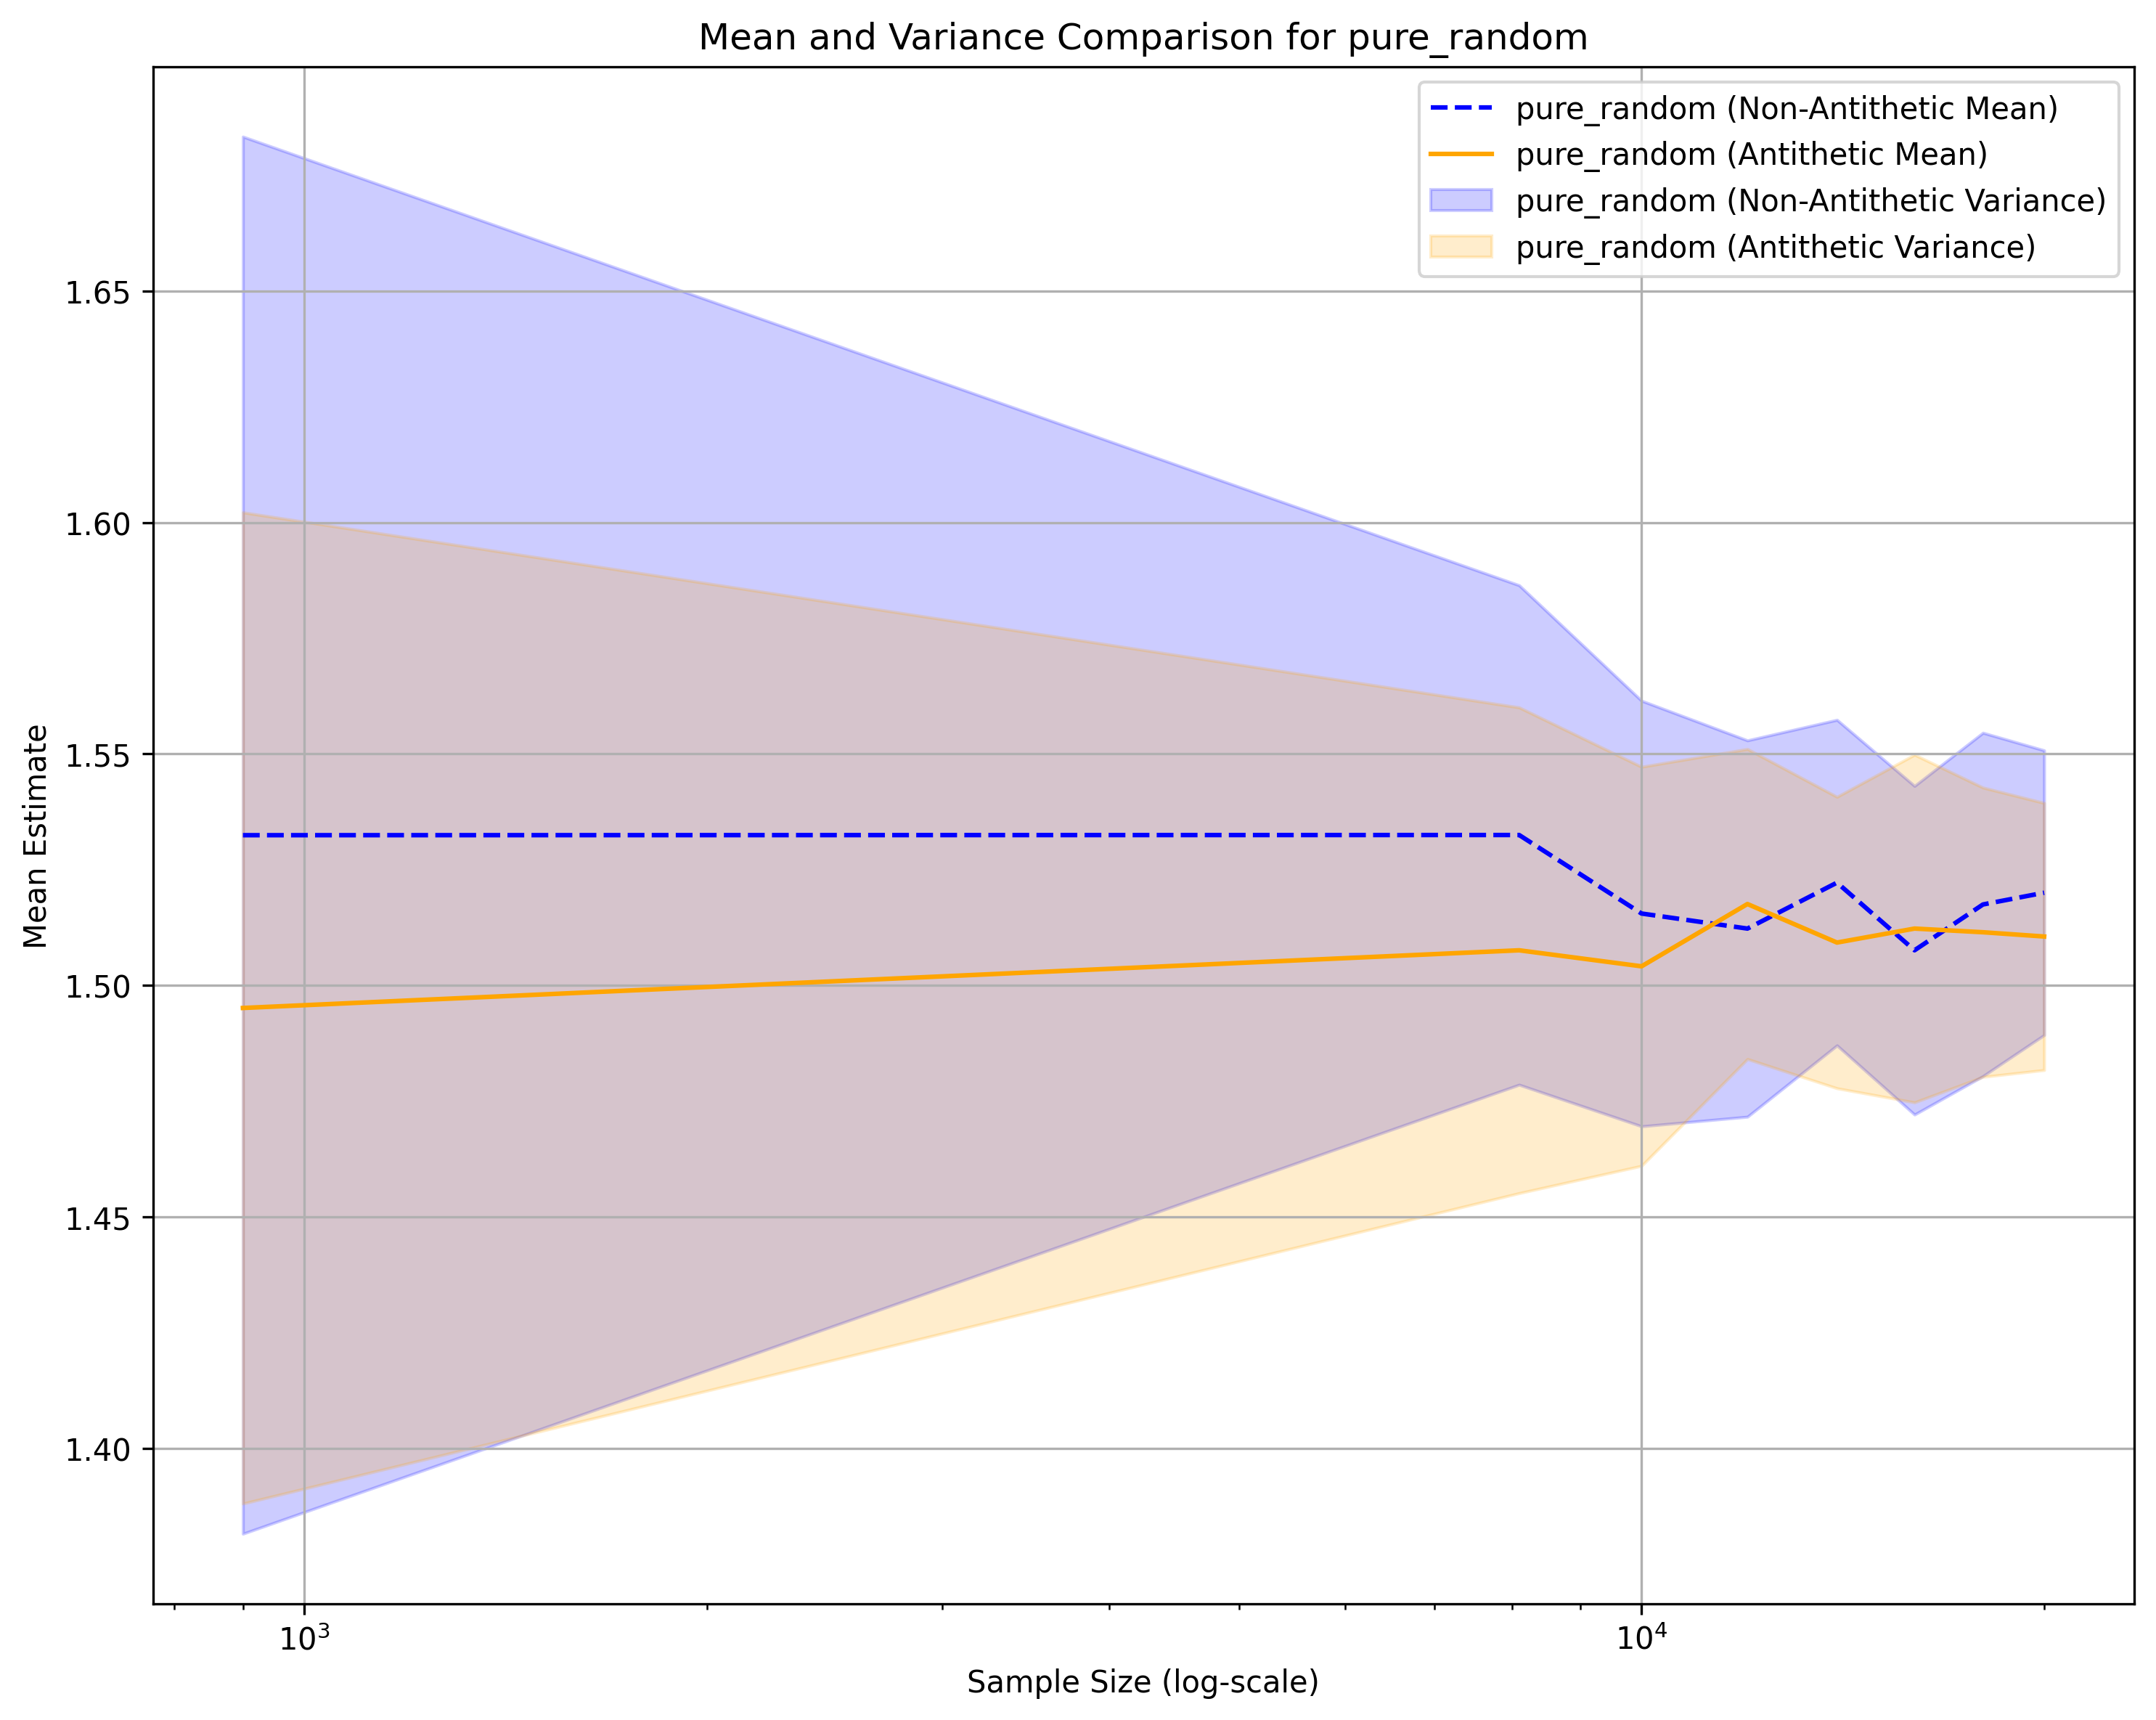

Total Variance for lhs (Non-Antithetic): 0.01653343288697405
Total Variance for lhs (Antithetic): 0.011376498666243639


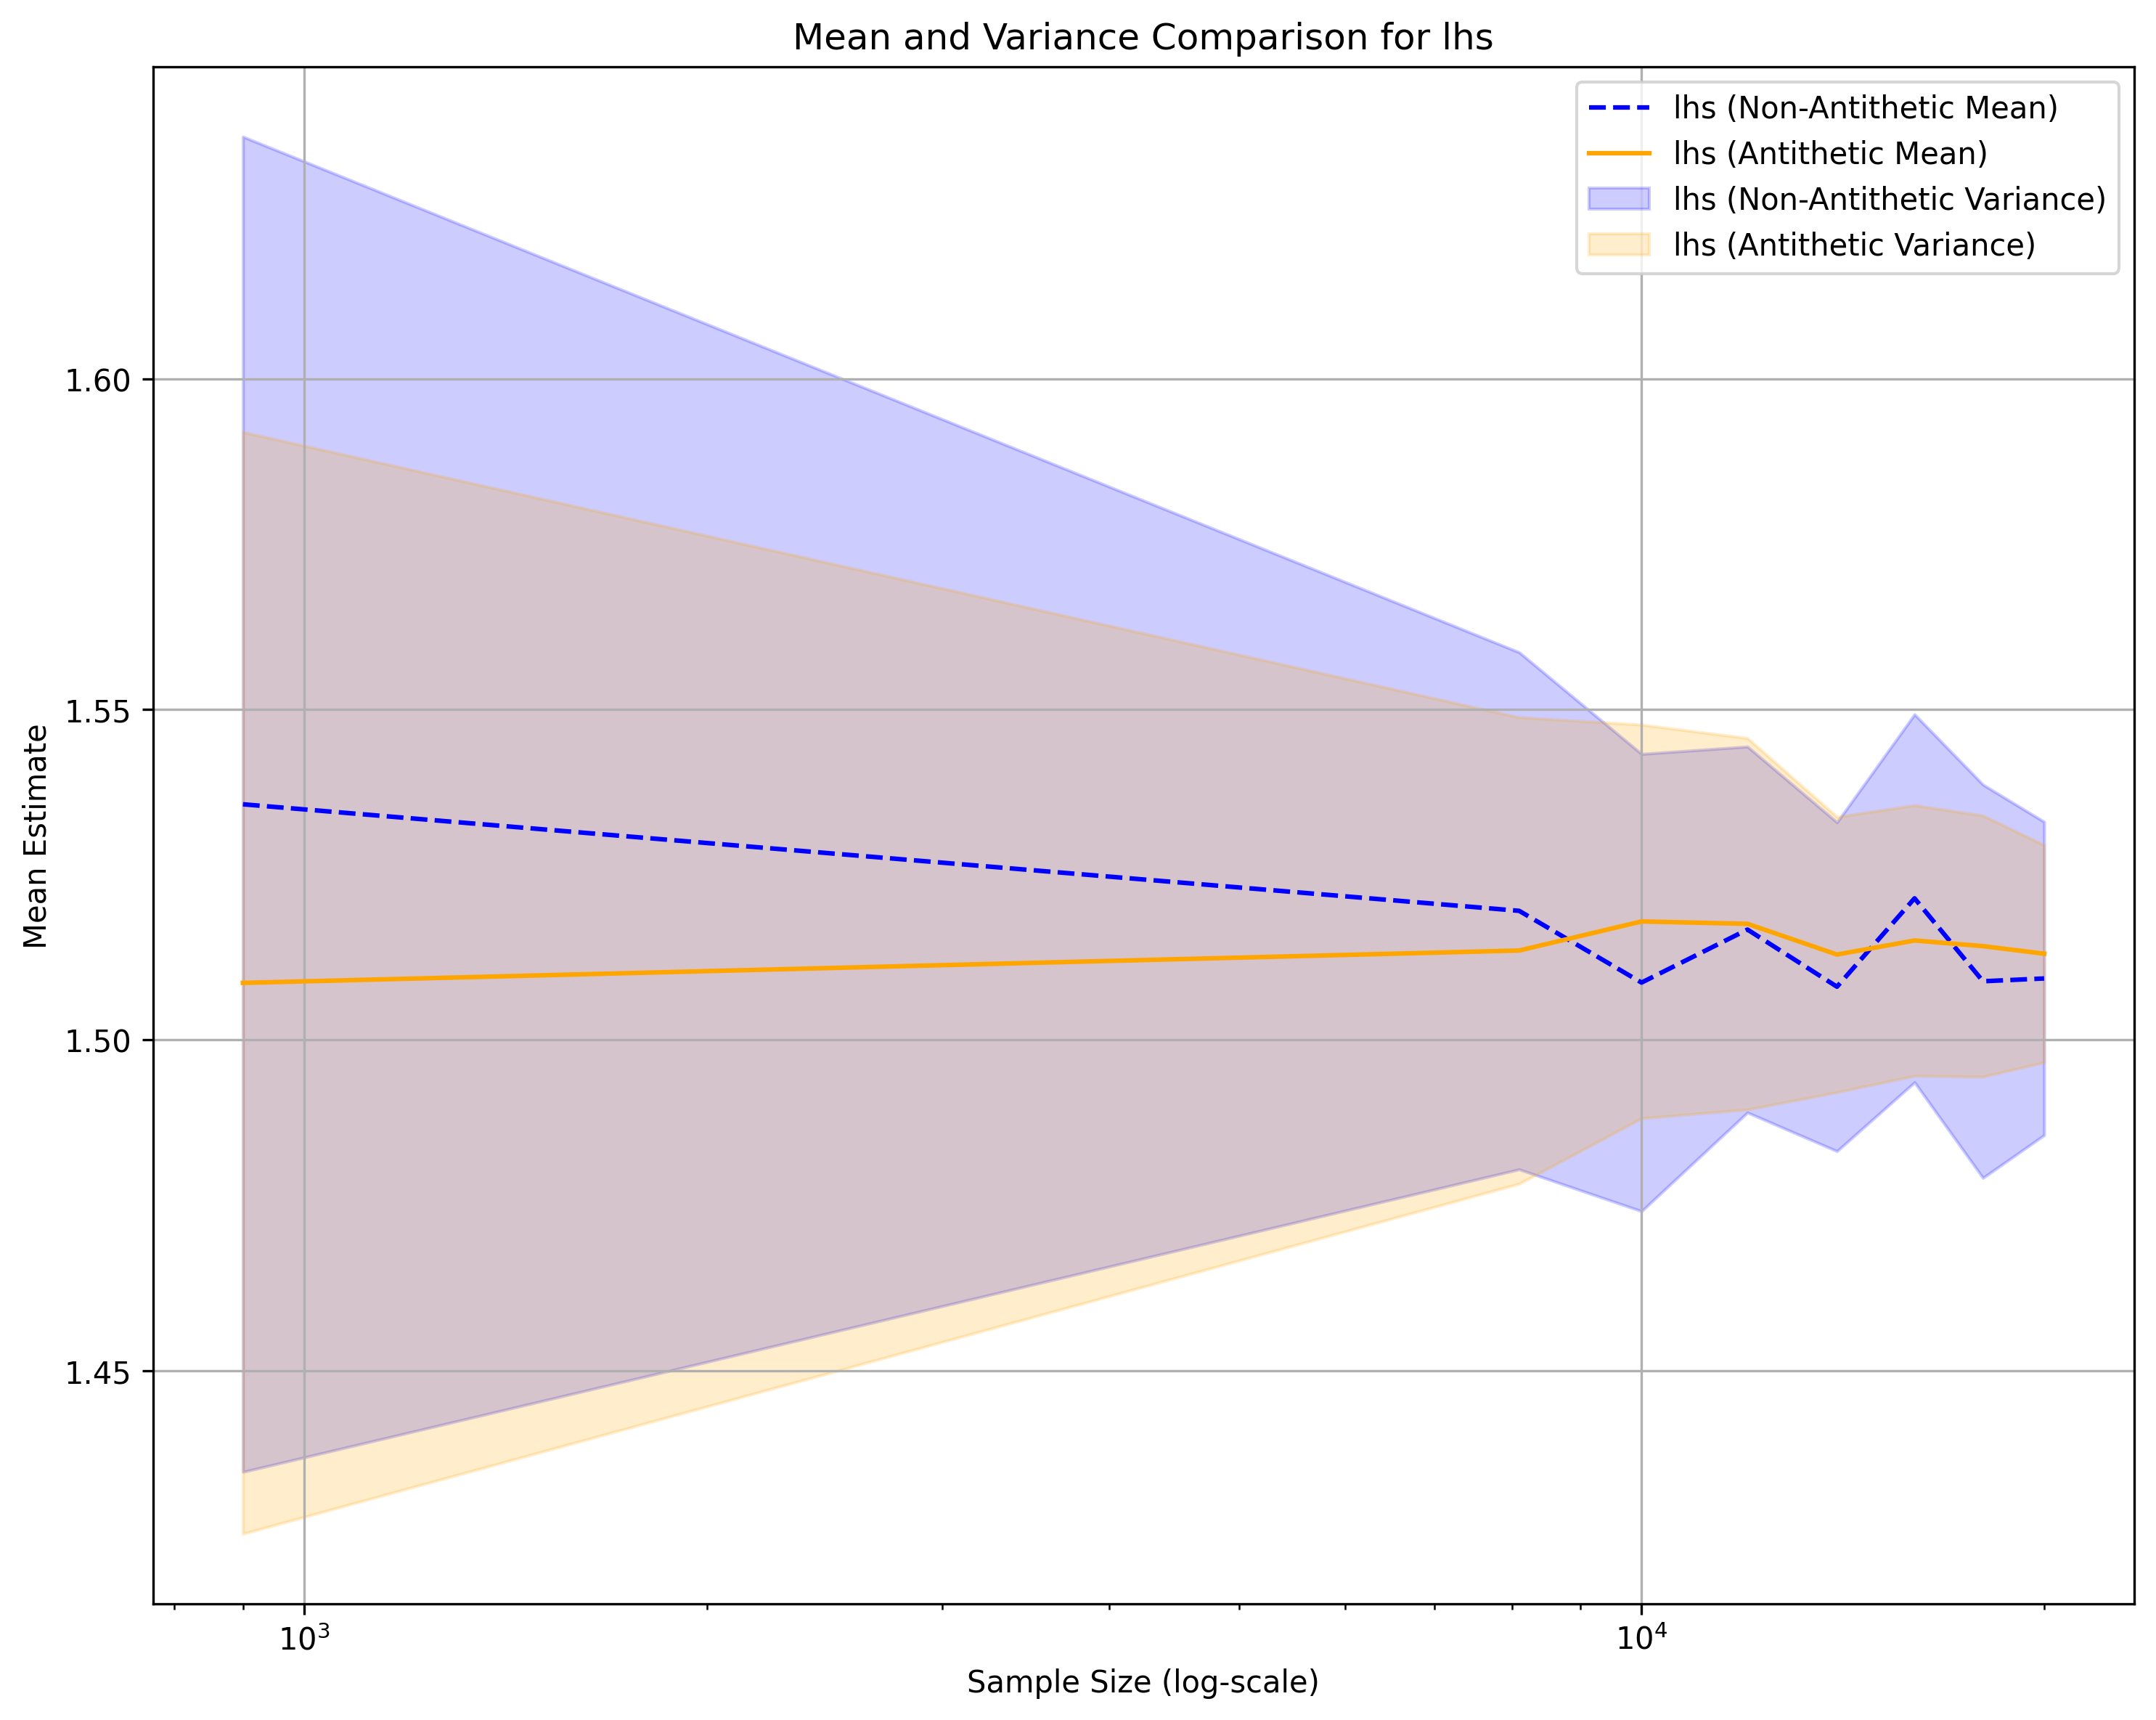

Total Variance for orthogonal (Non-Antithetic): 4.437342591868191e-31
Total Variance for orthogonal (Antithetic): 0.5924633207514849


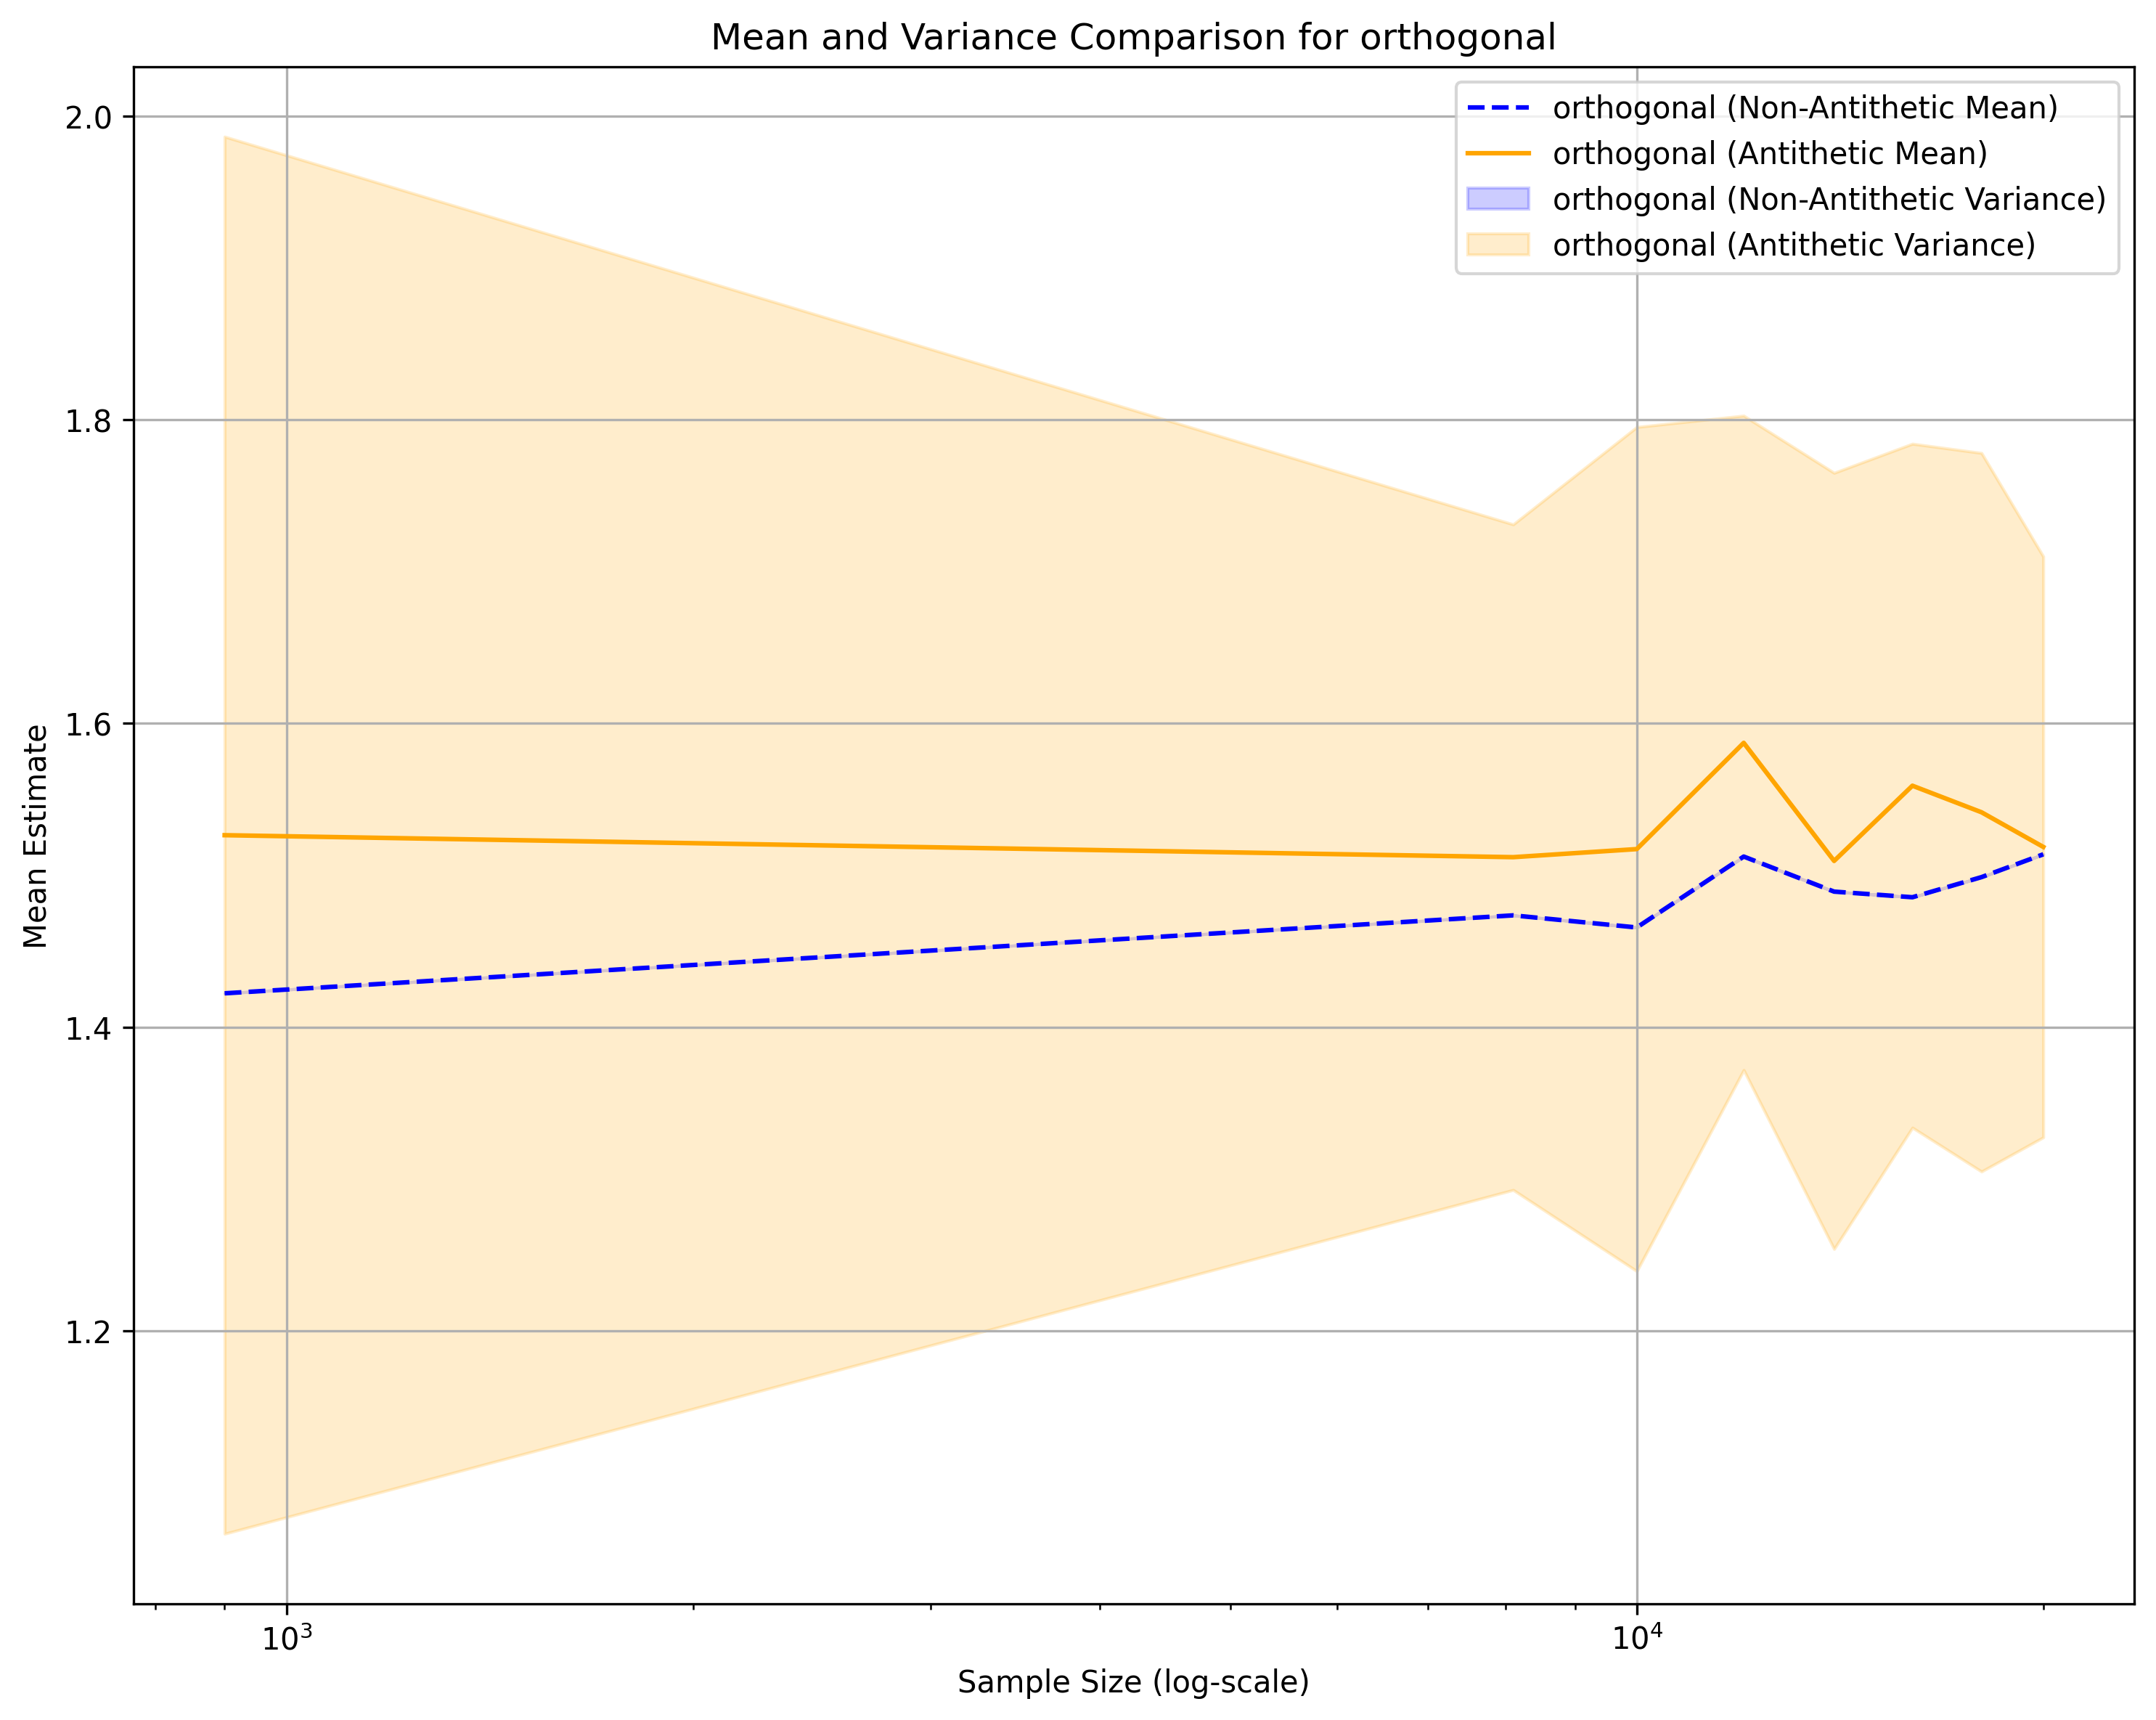

In [ ]:
#All the plots are displayed with a dpi of 300 to get high-resolution plots.

n_samples = [900, 8100, 10000, 12000, 14000, 16000, 18000, 20000]

plot_antithetic_comparison("pure_random", results, results_antithetic, n_samples)

plot_antithetic_comparison("lhs", results, results_antithetic, n_samples)

plot_antithetic_comparison("orthogonal", results, results_antithetic, n_samples)

In [463]:
#Perform t-tests and print them

n_samples = [900, 8100, 10000, 12000, 14000, 16000, 18000, 20000, 30000]
sample_types = ['pure_random', 'lhs', 'orthogonal']

comparison_results = statistical_tests(results, results_antithetic, sample_types, n_samples)

for method in sample_types:
    print(f"Comparison for {method}:")
    print(f"  t-test (Means): {comparison_results[method]['t-test (Means)']}")
    print(f"  Bartlett-test (Variances): {comparison_results[method]['Bartlett-test (Variances)']}")

Comparison for pure_random:
  t-test (Means): {'t-statistic': 2.8707707991669196, 'p-value': 0.004195938023312102}
  Bartlett-test (Variances): {'Bartlett-statistic': 23.750685648126304, 'p-value': 1.0965630445219857e-06}
Comparison for lhs:
  t-test (Means): {'t-statistic': 0.812515153433626, 'p-value': 0.416720762851315}
  Bartlett-test (Variances): {'Bartlett-statistic': 19.858782501433062, 'p-value': 8.337878344753904e-06}
Comparison for orthogonal:
  t-test (Means): {'t-statistic': -3.2713292267347245, 'p-value': 0.0011511687811576984}
  Bartlett-test (Variances): {'Bartlett-statistic': 1425.6196472663655, 'p-value': 0.0}
